# CodSoft DS Internship Assignment 1: Survival Prediction using Titanic Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Loading The Data

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

# Exploring The Data

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.groupby('Sex')['Age'].mean().reset_index()

,Sex,Age
0,female,27.915709
1,male,30.726645


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df.drop('Cabin', axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Analysis & Visualization

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
gender = df['Sex'].value_counts()
gender

,count
Sex,
male,577
female,312


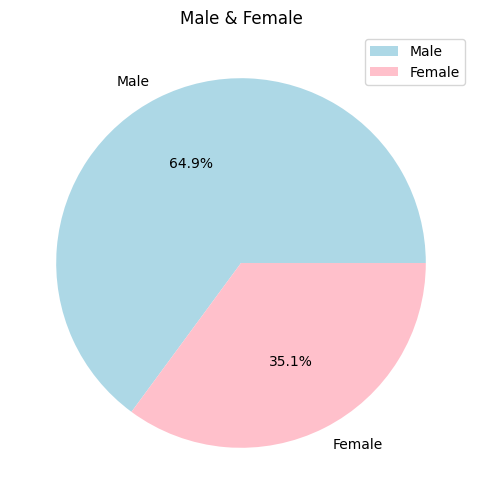

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(gender, labels=['Male', 'Female'] ,autopct='%.1f%%', colors=['lightblue','pink'])
plt.legend()
plt.title('Male & Female')
plt.show()

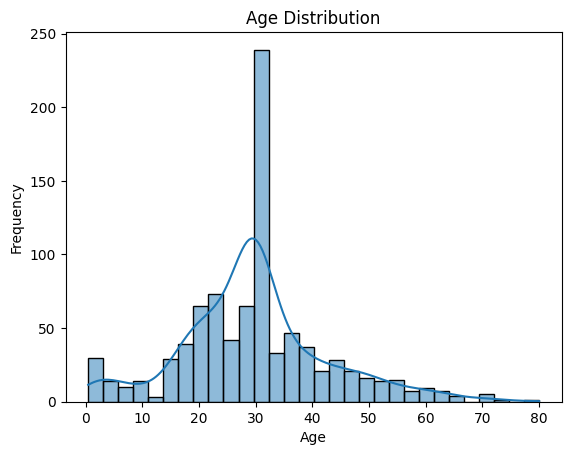

In [ ]:
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sv_sex = df[['Survived','Sex']].value_counts().reset_index()
sv_sex

,Survived,Sex,count
0,0,male,468
1,1,female,231
2,1,male,109
3,0,female,81


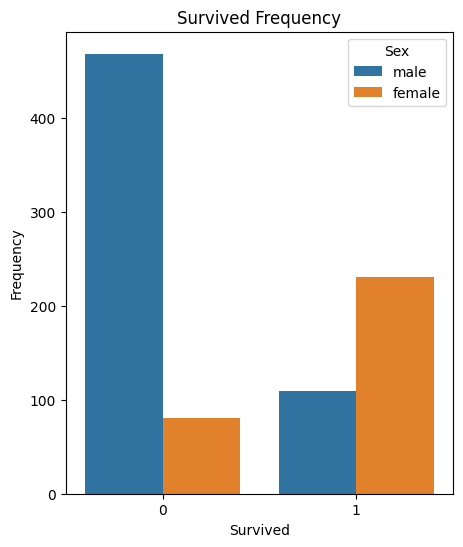

In [ ]:
plt.figure(figsize=(5,6))
sns.barplot(data=sv_sex , x=sv_sex['Survived'], y=sv_sex['count'], hue=sv_sex['Sex'])
plt.title('Survived Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Em_sex = df[['Embarked', 'Sex']].value_counts().reset_index()
Em_sex

,Embarked,Sex,count
0,S,male,441
1,S,female,203
2,C,male,95
3,C,female,73
4,Q,male,41
5,Q,female,36


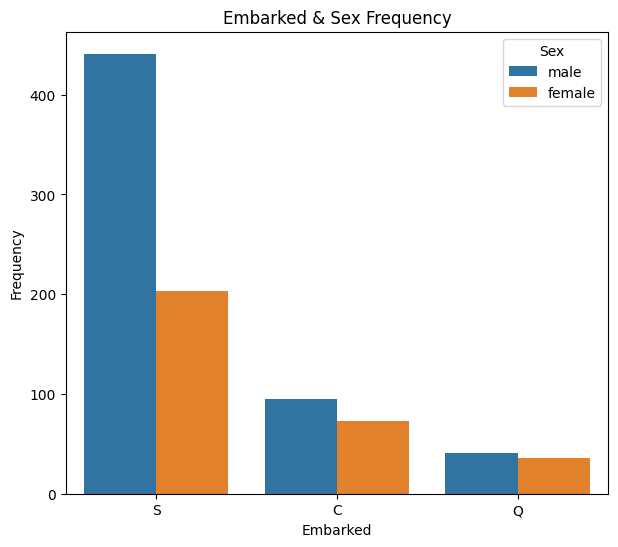

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(data=Em_sex , x=Em_sex['Embarked'], y=Em_sex['count'], hue=Em_sex['Sex'])
plt.title('Embarked & Sex Frequency')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sv_em = df[['Survived', 'Embarked']].value_counts().reset_index()
sv_em

,Survived,Embarked,count
0,0,S,427
1,1,S,217
2,1,C,93
3,0,C,75
4,0,Q,47
5,1,Q,30


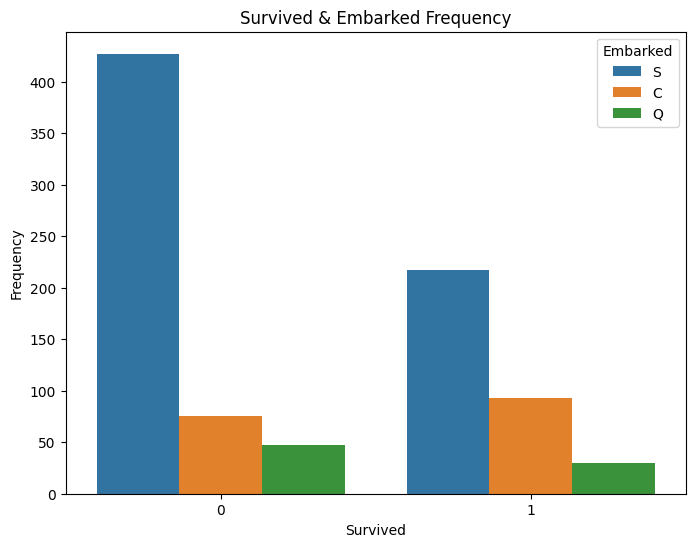

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=sv_em , x=sv_em['Survived'], y=sv_em['count'], hue=sv_em['Embarked'])
plt.title('Survived & Embarked Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sv_class = df[['Survived', 'Pclass']].value_counts().reset_index()
sv_class

,Survived,Pclass,count
0,0,3,372
1,1,1,134
2,1,3,119
3,0,2,97
4,1,2,87
5,0,1,80


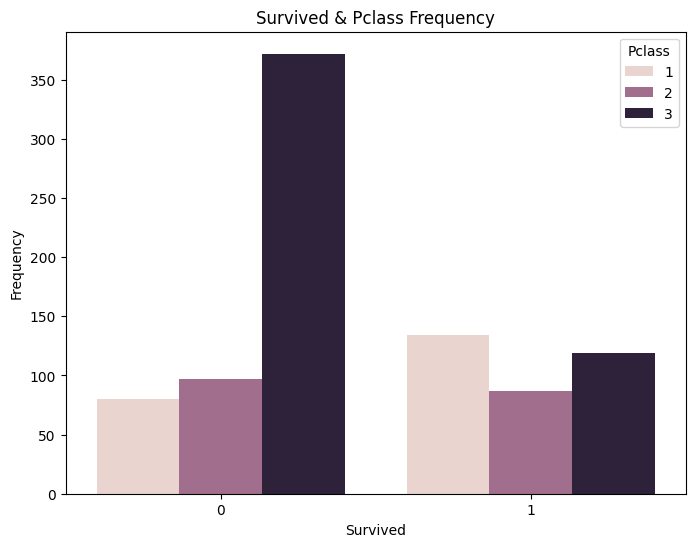

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=sv_class , x=sv_class['Survived'], y=sv_class['count'], hue=sv_class['Pclass'])
plt.title('Survived & Pclass Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sibling = df['SibSp'].value_counts().reset_index()
sibling

,SibSp,count
0,0,606
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


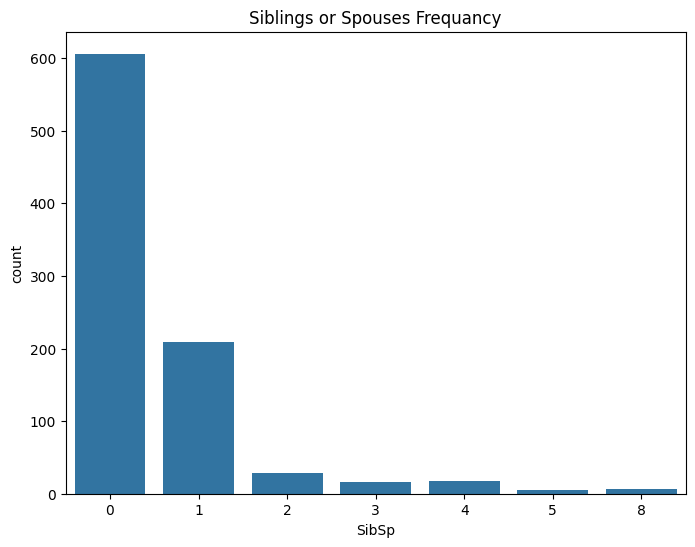

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=sibling['SibSp'], y=sibling['count'])
plt.title('Siblings or Spouses Frequancy')
plt.show()

In [ ]:
sv_sibling = df[['Survived', 'SibSp']].value_counts().reset_index()
sv_sibling

,Survived,SibSp,count
0,0,0,398
1,1,0,208
2,1,1,112
3,0,1,97
4,0,2,15
5,0,4,15
6,1,2,13
7,0,3,12
8,0,8,7
9,0,5,5


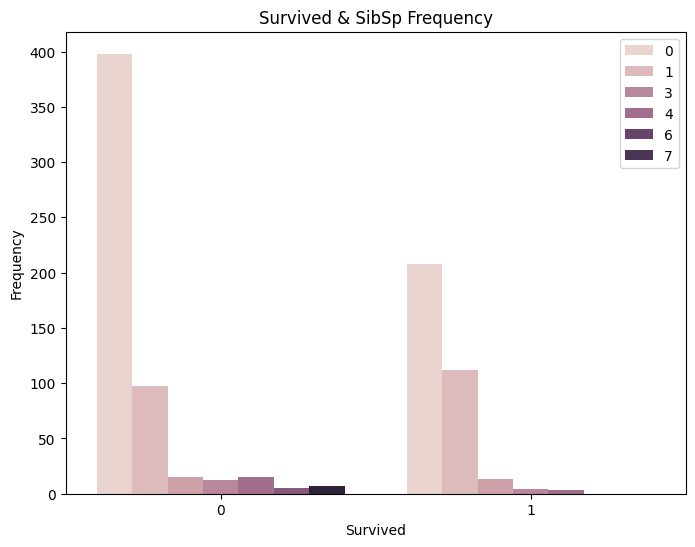

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=sv_sibling , x=sv_sibling['Survived'], y=sv_sibling['count'], hue=sv_sibling['SibSp'])
plt.title('Survived & SibSp Frequency')
plt.legend(loc='upper right')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

# Bulid The Model

In [ ]:
test = df.drop(['PassengerId','Name','Ticket'], axis=1)
test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
test['Sex'] = label_encoder.fit_transform(test['Sex'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])

In [ ]:
test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [ ]:
x= test.drop('Survived', axis=1)
y = test['Survived']

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11)

### Logistic Regression

In [ ]:
model_logistic = LogisticRegression()

In [ ]:
model_logistic.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model_logistic.score(X_train,Y_train)

0.7946554149085795

In [ ]:
model_logistic.score(x_test,y_test)

0.8426966292134831